In [1]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
!wget $data

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
--2024-01-02 21:49:03--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... failed: Name or service not known.
wget: unable to resolve host address 'raw.githubusercontent.com'


In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

Toutes les colonnes de type string

In [5]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
# ou encore:
[col for col in df.columns if df[col].dtype == 'object']

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.3 Exploratory data analysis

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution of price

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/wm18vw/miniconda3/envs/machineLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

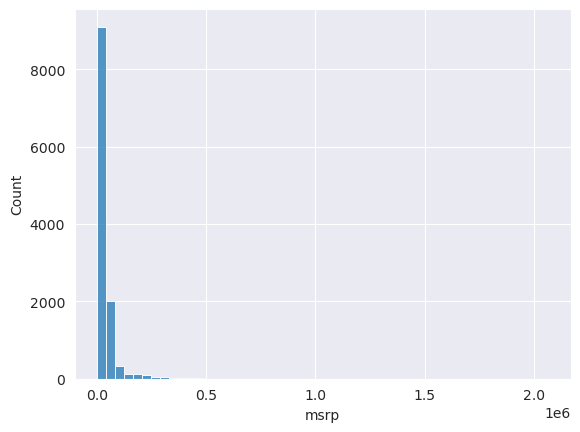

In [11]:
# bins c'est le nombre de bars que l'on peut mettre sur tout l'axe des x
# 1e6 = 1000000
sns.histplot(data=df.msrp, bins=50)

<Axes: >

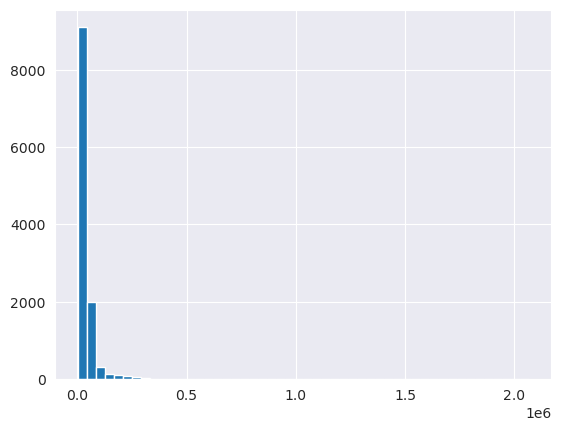

In [12]:
# avec le matplotlib intégré à Pandas
df.msrp.hist(bins=50)

/home/wm18vw/miniconda3/envs/machineLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

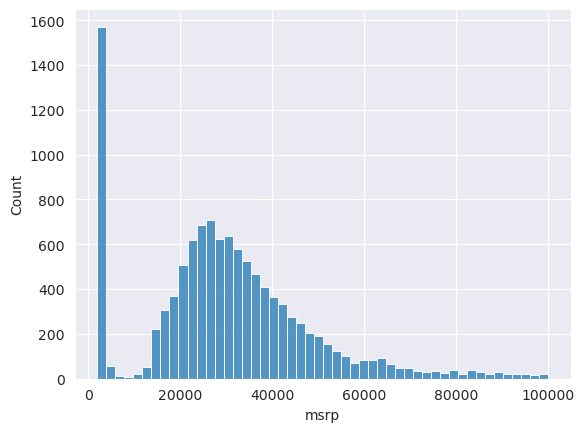

In [13]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [14]:
np.log([0, 1, 10, 1000, 100000])

/tmp/ipykernel_2530/3676589626.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1, 10, 1000, 100000])


array([       -inf,  0.        ,  2.30258509,  6.90775528, 11.51292546])

Pour contrer le problème avec le 0, on fait +1

In [15]:
np.log([0 + 1 , 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

log1p fait la meme chose:

In [16]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [17]:
price_logs = np.log1p(df.msrp)

In [18]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

/home/wm18vw/miniconda3/envs/machineLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

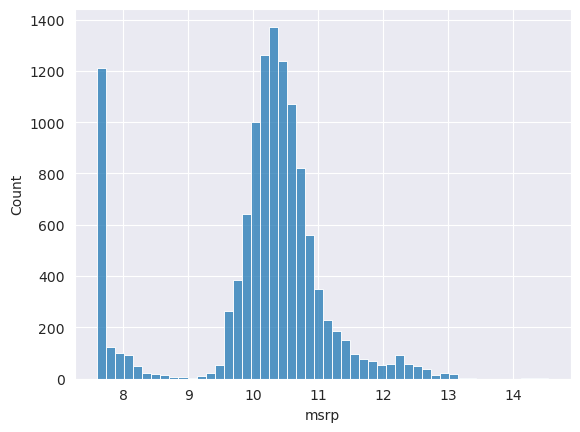

In [19]:
sns.histplot(data=price_logs, bins=50)

Nous avons obtenus une distribution normale, c'est un situation idéale pour le modèle

Missing values (nan)

In [20]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

engine_fuel_type, engine_cylinders, number_of_doors, market_category  ont des valeurs manquantes

## 2.4 Setting up the validation framework

On divise le dataset en une partie d'entraintement, une de validation et une de test
**Train** 60%
**Validation** 20%
**Test** 20%

In [21]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n * 0.6)

In [22]:
n, n_val + n_test + n_train

(11914, 11912)

Les valeurs ne sont pas les mêmes du aux arrondis, donc on fait autrement:

In [23]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [24]:
n, n_val + n_test + n_train

(11914, 11914)

In [25]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [26]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [27]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


On constate qu'il faut trier le dataset

In [28]:
idx = np.arange(n)

In [29]:
np.random.seed(2)
np.random.shuffle(idx)

In [30]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [31]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [32]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [33]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [34]:
df_train.msrp

0        14410
1        19685
2        19795
3         2000
4        56260
         ...  
7145     54900
7146     29215
7147     34675
7148    303300
7149     37820
Name: msrp, Length: 7150, dtype: int64

Visualisation en valeurs logarithmique + création des vars

In [35]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [36]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [37]:
len(y_train)

7150

## 2.5 Linear regression

In [38]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [39]:
xi = [453, 11, 86]

In [40]:
def g(xi):
    return 10000

In [42]:
g(xi)

10000

g(xi) = W0 + W1 * xi1 + W2 * xi2
W0: Bias term (is the prediction that we will make)
Par exemple:
xi1:    engine capacity
W1:     engine horse power (453Hp)
xi2:    city_mpg (miles per gallon in the city) (11)
W2:     11
xi3:    popularity
W3: 86

Forme compacte:
g(xi) = W0 + Sum de j=1 à 3 de Wj * xij

In [43]:
w0 = 0
w = [1, 1, 1]

In [44]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [45]:
linear_regression(xi)

550

In [48]:
w0 = 7.17 # bias term
w = [0.01, 0.04, 0.002] # weight w1, w2, w3

In [49]:
linear_regression(xi)

12.312

7.17 + 453*0.01 + 11*0.04 + 86*0.002 = 12.312

12.312 est une valeure obtenue en utilisant le logarithme du prix donc pour retrouver la prédiction du prix nous utilisons l'exponentielle:

In [51]:
np.expm1(12.312)

222347.2221101062

Nous obtenons 222347.22$

## 2.6 Linear regression vector form

In [59]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    return res

In [60]:
def linear_regression(xi):
    return w0 + dot(xi, w)

w = [w0 w1 w2 ... wn]
xi = [xi0 xi1 xi2 ... xin]
xi = [ 1 xi1 xi2 ... xin]
w^T xi = xi^T w = w0 + ...

In [61]:
w_new = [w0] + w

In [62]:
[1] + [1, 2, 3]

[1, 1, 2, 3]

In [63]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [66]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [67]:
linear_regression(xi)

12.312

X^{m*(n+1)}
--              --       -- --      x1^T * w
|1  x11 ... x1n   |     |  w0 |     x2^T * w
|1  x21 ... x2n   |     |  w1 | =   ...
|1  ... ... ...   |     | ... |     ...
|1  xm1 ... xmn   |     | wn  |     xm^T * w
--              --       -- --

Xw * w = y_pred

In [68]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [70]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]
X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [71]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [74]:
def linear_regression(xi):
    return X.dot(w_new)

In [75]:
linear_regression(xi)

array([12.38 , 13.552, 12.312])

## Notes

The formula of linear regression can be synthesized with the dot product between features and weights. The feature vector includes the *bias* term with an *x* value of one, such as $w_{0}^{x_{i0}},\ where\ x_{i0} = 1\ for\ w_0$.

When all the records are included, the linear regression can be calculated with the dot product between ***feature matrix*** and ***vector of weights***, obtaining the `y` vector of predictions. 

The entire code of this project is available in [this jupyter notebook](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/02-carprice.ipynb). 

## 2.7 Training a linear regression model

Normal Equation:

$w$ = $(X^TX)^{-1}X^Ty$

Where:

$X^TX$ is the Gram Matrix

g(x) = Xw ≈ y
 Xw = y
 We need solve w (weight)
$w = X^{-1}y$
$X^{T}Xw = X^{T}y$
$X^{T}X$ => Gram matrix
$(X^{T}X)^{-1}X^TXw = (X^{T}X)^{-1}X^Ty$
Identity matrix
Iw = w
$w =(X^{T}X)^{-1}X^Ty$

In [76]:
def train_linear_regression(X):
    pass
    #arrivé à 4min40 de la video